In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jatinthakur706/most-watched-netflix-original-shows-tv-time")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 2.29k/2.29k [00:00<00:00, 3.15MB/s]

Extracting files...
Path to dataset files: C:\Users\boris\.cache\kagglehub\datasets\jatinthakur706\most-watched-netflix-original-shows-tv-time\versions\1


In [13]:
data_path = "C:\\Users\\boris\\.cache\\kagglehub\\datasets\\jatinthakur706\\most-watched-netflix-original-shows-tv-time\\versions\\1\\imdb.csv"
data = pd.read_csv(data_path)
data.head(10)

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
0,1.0,Stranger Things,15,60 min,"Drama, Fantasy, Horror",8.7,"1,327,188"
1,2.0,13 Reasons Why,18,60 min,"Drama, Mystery, Thriller",7.5,"314,321"
2,3.0,Orange Is the New Black,18,59 min,"Comedy, Crime, Drama",8.0,"319,342"
3,4.0,Black Mirror,18,60 min,"Drama, Mystery, Sci-Fi",8.7,"636,319"
4,5.0,Money Heist,15,60 min,"Action, Crime, Drama",8.2,"529,086"
5,6.0,Lucifer,15,"4,393 min","Crime, Drama, Fantasy",8.1,"354,155"
6,7.0,Narcos,15,50 min,"Biography, Crime, Drama",8.8,"467,909"
7,8.0,Daredevil,15,60 min,"Action, Crime, Drama",8.6,"472,940"
8,9.0,Sense8,15,60 min,"Drama, Mystery, Sci-Fi",8.2,"162,528"
9,10.0,Jessica Jones,15,56 min,"Action, Crime, Drama",7.9,"226,187"


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     float64
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     object 
 3   runtime             80 non-null     object 
 4   genre               80 non-null     object 
 5   rating              80 non-null     float64
 6   votes               80 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.5+ KB


In [15]:
data.columns

Index(['lister-item-index', 'lister-item-header', 'certificate', 'runtime',
       'genre', 'rating', 'votes'],
      dtype='object')

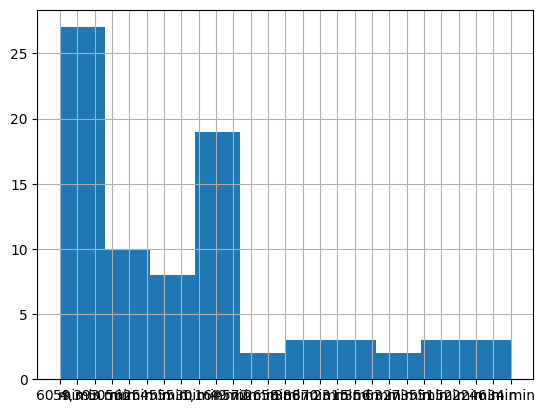

In [16]:
data['runtime'].hist();

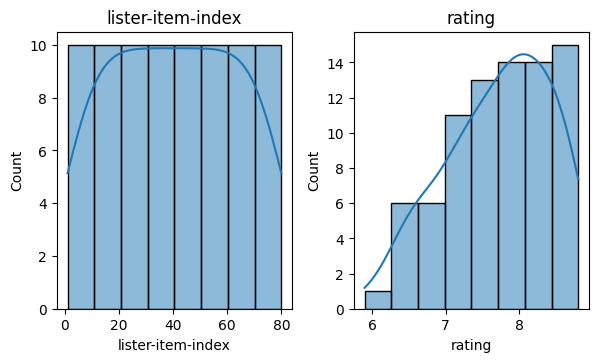

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

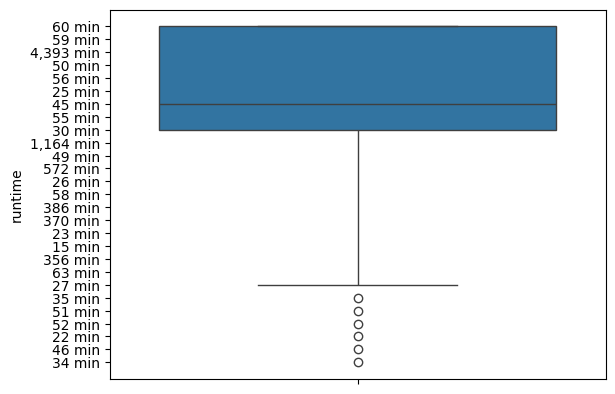

In [18]:
sns.boxplot(data['runtime']);

C:\Users\boris\AppData\Local\Temp\ipykernel_6544\2032339299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='genre',


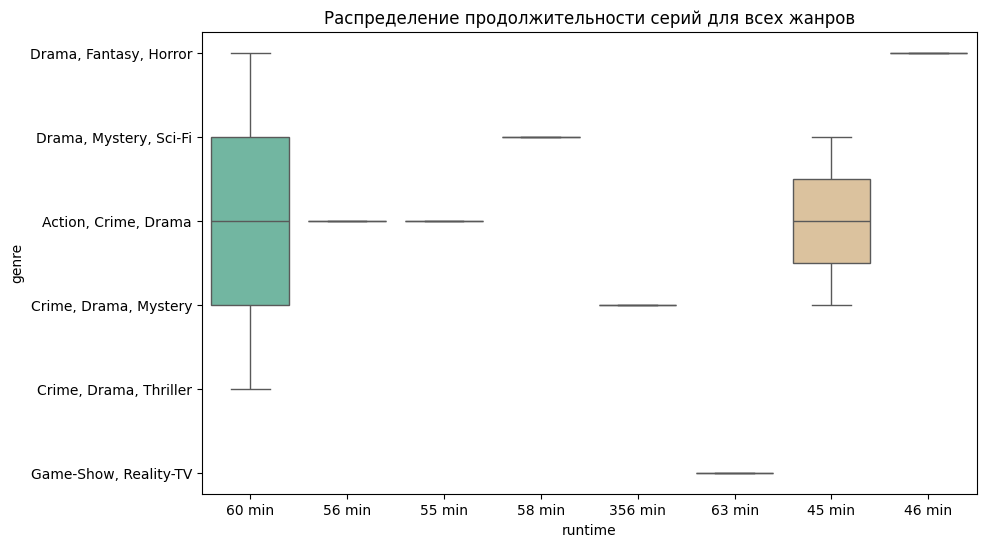

In [23]:
top_data = data[['genre', 'runtime']]
top_data = top_data.groupby('genre').sum()
top_data = top_data.sort_values('runtime', ascending=False)
top_genres = top_data[:6].index.values
plt.figure(figsize=(10, 6))
sns.boxplot(y='genre', 
            x='runtime', 
            data=data[data.genre.isin(top_genres)], palette='Set2')
plt.title('Распределение продолжительности серий для всех жанров')
plt.show()

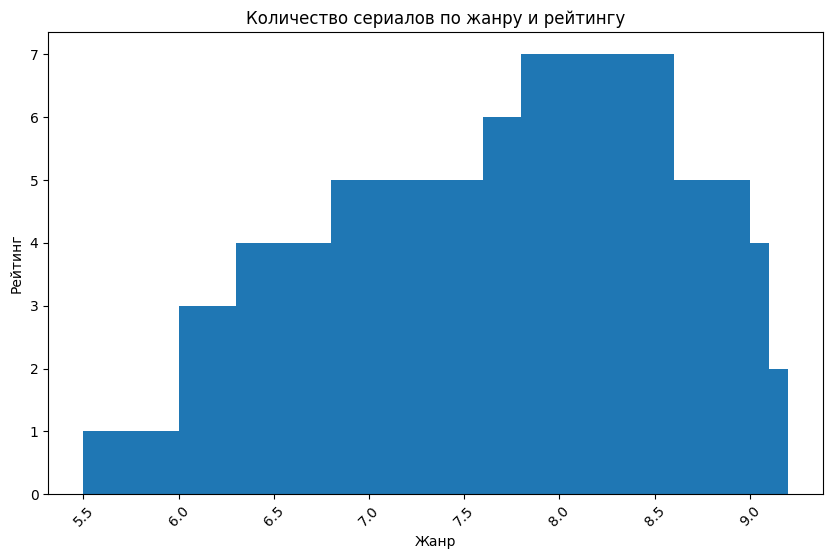

In [25]:
	
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Количество сериалов по жанру и рейтингу')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45)
plt.show()

In [27]:
feats = [f for f in data.columns if 'rating' in f]
feats

['rating']

In [28]:
genre_counts = data['rating'].value_counts()
print(genre_counts)

rating
8.2    7
8.0    6
8.6    5
7.2    5
8.7    4
7.5    4
7.9    4
7.7    4
6.7    4
8.5    4
7.8    4
8.4    3
6.4    3
7.4    3
8.1    2
8.3    2
8.8    2
7.0    2
7.3    2
7.1    2
7.6    2
6.3    1
6.5    1
6.8    1
6.6    1
5.9    1
6.9    1
Name: count, dtype: int64


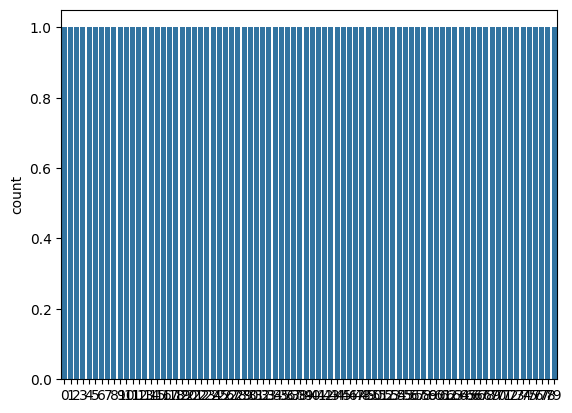

In [29]:
sns.countplot(data['rating']);

Index(['lister-item-index', 'lister-item-header', 'certificate', 'runtime',
       'genre', 'rating', 'votes'],
      dtype='object')

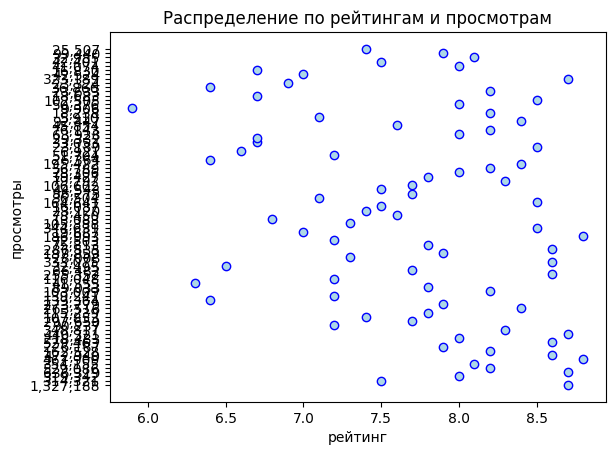

In [39]:
plt.scatter(data['rating'], 
            data['votes'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('рейтинг')
plt.ylabel('просмотры')
plt.title('Распределение по рейтингам и просмотрам')
plt.show()

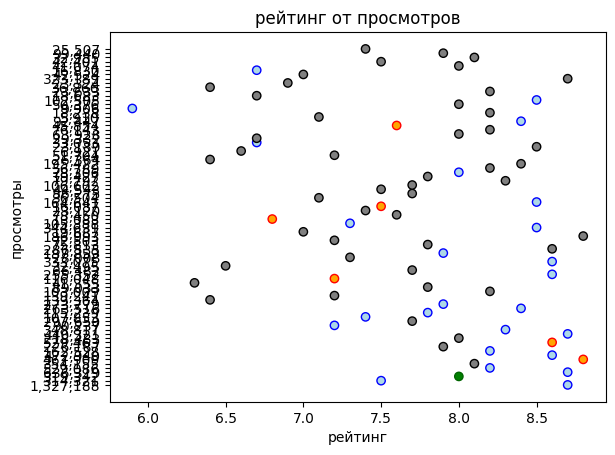

In [40]:
c = data['runtime'].map({
    '60 min': 'lightblue', 
    '50 min': 'orange', 
    '59 min': 'green', 
}).fillna('gray')  # Заполнение NaN значением по умолчанию

edge_c = data['runtime'].map({
    '60 min': 'blue', 
    '50 min': 'red', 
    '59 min': 'darkgreen', 
}).fillna('black')  # Заполненил NaN значением по умолчанию

plt.scatter(data['rating'], data['votes'],
            c=c, edgecolors=edge_c)
plt.xlabel('рейтинг')
plt.ylabel('просмотры')
plt.title('рейтинг от просмотров')
plt.show()

In [41]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

                    lister-item-index  lister-item-header  certificate  \
lister-item-index                 NaN                 NaN          NaN   
lister-item-header                NaN                 NaN          NaN   
certificate                       NaN                 NaN          NaN   
runtime                           NaN                 NaN          NaN   
genre                             NaN                 NaN          NaN   
rating                            NaN                 NaN          NaN   
votes                             NaN                 NaN          NaN   

                    runtime  genre  rating  votes  
lister-item-index       NaN    NaN     NaN    NaN  
lister-item-header      NaN    NaN     NaN    NaN  
certificate             NaN    NaN     NaN    NaN  
runtime                 NaN    NaN     NaN    NaN  
genre                   NaN    NaN     NaN    NaN  
rating                  NaN    NaN     NaN    NaN  
votes                   NaN    NaN     NaN 